In [2]:
from matplotlib import pyplot as plt
import numpy as np

# Modelación del desarrollo de una infección viral con sistemas de ecuaciones diferenciales
### Autor: Santiago Escamilla del Angel
Este trabajo se basa mayormente en el libro: $\textit{Modeling and control of infectious diseases in the host}$ de Esteban A. Hernández-Vargas.

## Modelo UIV

Este modelo considera células suseptibles (U), células infectadas (I) y carga viral (V). 

Ecuaciones diferenciales que describen el desarrollo temporal de la VID:

$$dU = -\beta UV$$
$$dI = \beta UV - \delta I$$
$$dV = pI - cV$$

$p$: tasa de producción de viriones,   $\beta$ tasa de infección de células suseptibles

$c$: tasa de eliminación de viriones,  $\delta$ tasa de eliminación de células infectadas

Nota: A la unidad viral se le denomina virión.

### Solución del sistema de EDO por método de Euler

In [36]:
def fuiv(r): # definimos nuestro sistema de ecuaciones dentro de una función
    U = r[0] #suceptibles
    I = r[1] #infectadas
    V = r[2] #viriones
    
    dU = -beta*U*V
    dI = beta*U*V - delta*I 
    dV = p*I - c*V #las derivadas son respecto al tiempo

    return np.array([dU,dI,dV],float)

In [44]:
# Definimos otra función que resuelva numéricamente el sistema de 
# Ecuaciones mediante el método de Euler

def UIV_EULER(fuiv,r,a,b,N): #r es un arreglo con las condiciones iniciales 
    h = (b-a)/N #(a,b) es el intervalo temporal, N es el número de pasos
    lista_t = np.arange(a,b,h) 
    lista_U, lista_I, lista_V = [],[],[]

    for t in lista_t: 

        r += h*fuiv(r)

        lista_U.append(r[0])
        lista_I.append(r[1])
        lista_V.append(r[2])

    return lista_U, lista_I, lista_V, lista_t
#La función regresa listas con la contidad de células suceptibles, infectadas y viriones.

In [94]:
# definimos las condiciones iniciales

r_uiv = np.array([1000,0,100],float)
beta = 0.01
delta = 0.5
p = 0.05
c = 0.5
lista_U, lista_I, lista_V, lista_t = UIV_EULER(fuiv,r_uiv,0,100,1e5) #resolvemos el sistema

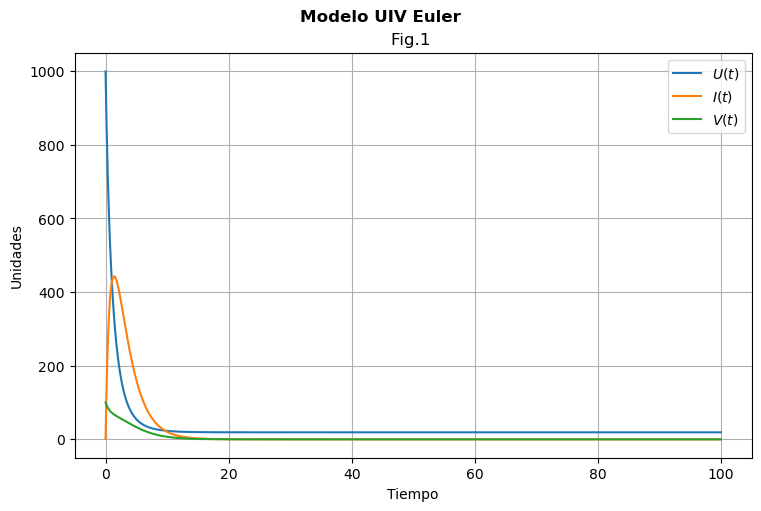

In [46]:
plt.figure(figsize=(7.5,5), layout="constrained")

plt.plot(lista_t, lista_U, label = r"$U(t)$")
plt.plot(lista_t, lista_I, label = r"$I(t)$")
plt.plot(lista_t, lista_V, label = r"$V(t)$")

plt.suptitle("Modelo UIV Euler", fontweight='bold')
plt.title("")
plt.ylabel("Unidades")
plt.xlabel("Tiempo")
plt.grid ()
plt.legend();

### Supervivencia de las células en función de la carga viral inicial

Se modificará el código anterior para que presente resultados finales cuando V(t) e I(t) sean menores a la unidad, esto es equivalente
a que el virus fue erradicado. Nos interesa el % de células que sobrevivieron.

In [42]:
def Survivor_cells_UIV(fuiv,r,h): #r es un arreglo con las condiciones iniciales 

    while r[2]>1 or r[1]>1: # La simulación termina si hay menos de un virión y menos una célula infectada
        
        r += h*fuiv(r)

        if r[0]<1: # también se acaba si no queda ninguna célula suceptible
            break
        
    return r[0]

In [58]:
r_uiv = np.array([1000,0,100],float)
Survivor_cells_UIV(fuiv,r_uiv,1e-4) #prueba para ver que la función regrese el valor esperado.

19.245839116041015

In [98]:
#Supervivencia de las células en función del número inicial de viriones
Survivor_list = []
c = 1.0 # tasa de eliminación
for i in range(0,500,10):
    r_uiv = np.array([1000,0,i],float)
    final_cells = Survivor_cells_UIV(fuiv,r_uiv,1e-4)
    Survivor_list.append(final_cells)


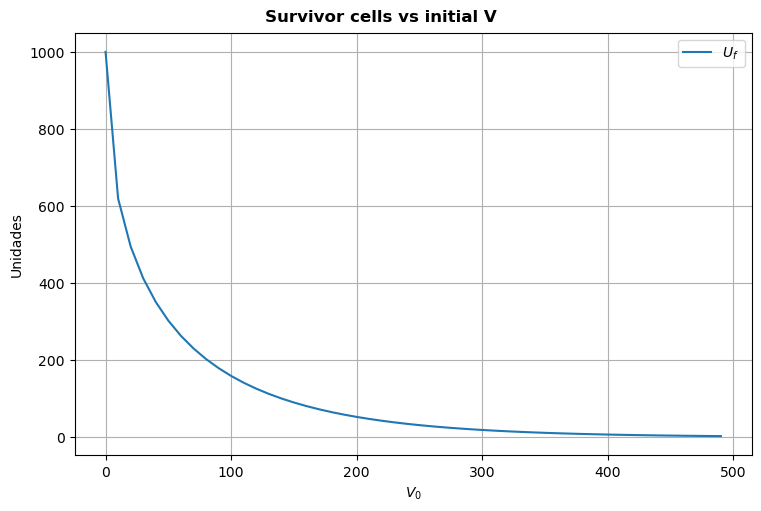

In [111]:
plt.figure(figsize=(7.5,5), layout="constrained")

plt.plot(range(0,500,10), Survivor_list, label = r"$U_f$")

plt.suptitle("Survivor cells vs initial V", fontweight='bold')
plt.title("")
plt.ylabel("Unidades")
plt.xlabel(r"$V_0$")
plt.grid ()
plt.legend();

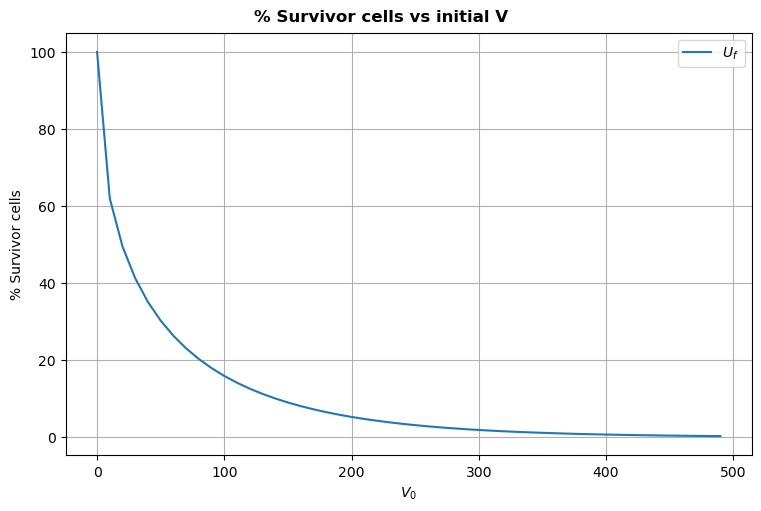

In [112]:
# Misma gráfica pero en porcentaje

plt.figure(figsize=(7.5,5), layout="constrained")

plt.plot(range(0,500,10), np.array(Survivor_list,float)/10, label = r"$U_f$")

plt.suptitle("% Survivor cells vs initial V", fontweight='bold')
plt.title("")
plt.ylabel("% Survivor cells")
plt.xlabel(r"$V_0$")
plt.grid ()
plt.legend();

### Supervivenvia de las células en funcion de la tasa de eliminación de virus
Ahora obtendremos las células que sobreviven en función del parámetro "c", que es la tasa de eliminación de las unidades virales.

In [102]:
Survivor_list2 = []

for i in np.linspace(0.0,10.0,50):
    r_uiv = np.array([1000,0,100],float)
    c = i
    final_cells = Survivor_cells_UIV(fuiv,r_uiv,1e-4)
    Survivor_list2.append(final_cells)

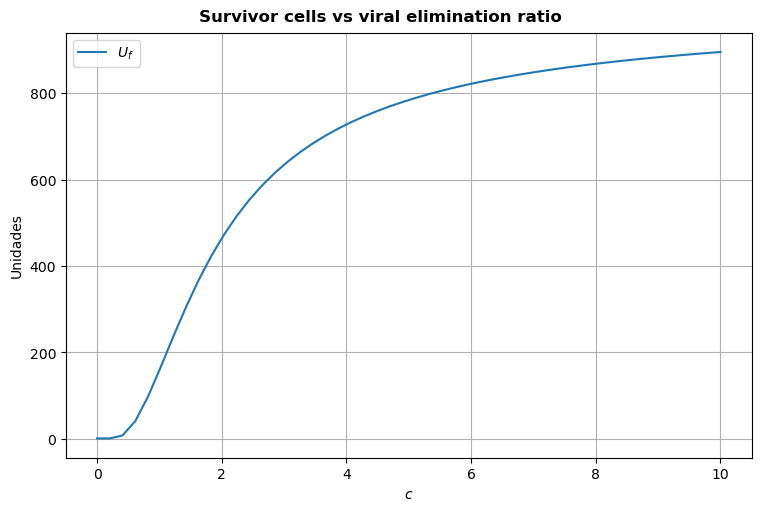

In [109]:
plt.figure(figsize=(7.5,5), layout="constrained")

plt.plot(np.linspace(0.0,10.0,50), Survivor_list2, label = r"$U_f$")

plt.suptitle("Survivor cells vs viral elimination ratio", fontweight='bold')
plt.title("")
plt.ylabel("Unidades")
plt.xlabel(r"$c$")
plt.grid ()
plt.legend();

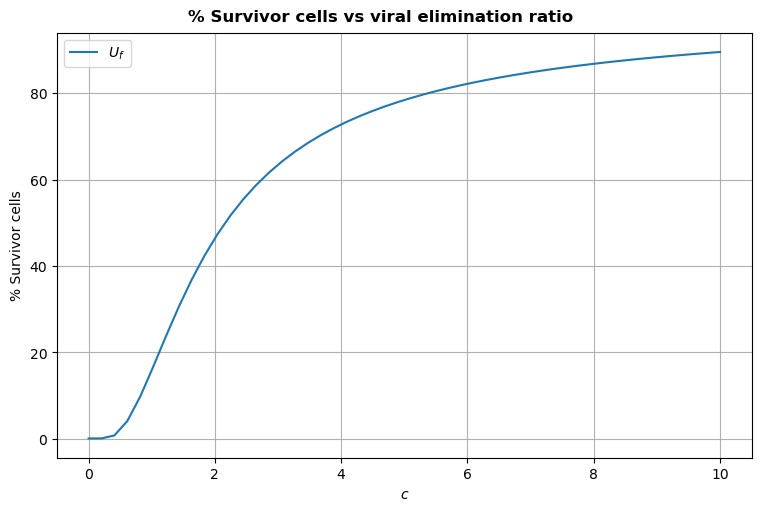

In [110]:
# Misma gráfica en porcentaje

plt.figure(figsize=(7.5,5), layout="constrained")

plt.plot(np.linspace(0.0,10.0,50), np.array(Survivor_list2,float)/10, label = r"$U_f$")

plt.suptitle("% Survivor cells vs viral elimination ratio", fontweight='bold')
plt.title("")
plt.ylabel("% Survivor cells")
plt.xlabel(r"$c$")
plt.grid ()
plt.legend();

### Carga viral máxima en función de la tasa de eliminación de virus
En esta sección se calcula la carga viral máxima alcanzada en el desarrollo de la infección en función del parámetro "c", que es la tasa de eliminación de virus.

In [21]:
#Condiciones para c vs max virions
C_list = np.linspace(
    start = 0.0,
    stop = 0.5,
    num=100)

beta = 0.01
delta = 0.5
p = 0.05

max_v = []
survivors = []
for c in C_list:
    
    r_uiv = np.array([1000,1,10],float)
    lista_U, lista_I, lista_V, lista_t = UIV_EULER(fuiv,r_uiv,0,100,1e5)
    
    max_v.append(max(lista_V))
    survivors.append(lista_U[-1])
    

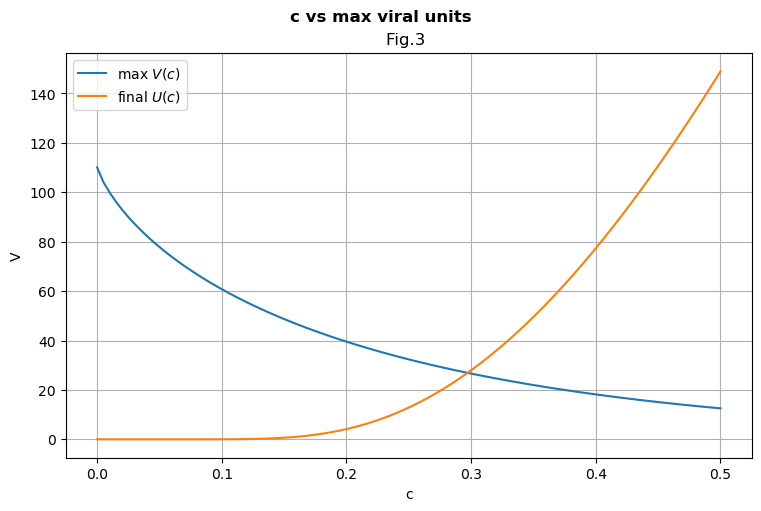

In [22]:
plt.figure(figsize=(7.5,5), layout="constrained")

plt.plot(C_list, max_v, label = r"max $V(c)$")
plt.plot(C_list, survivors, label = r"final $U(c)$")


plt.suptitle("c vs max viral units", fontweight='bold')
plt.title("Fig.3 ")
plt.ylabel("V")
plt.xlabel("c")
plt.grid ()
plt.legend();

### Normalización de los resultados

In [48]:
max_U = max(lista_U)
max_I = max(lista_I)
max_V = max(lista_V)

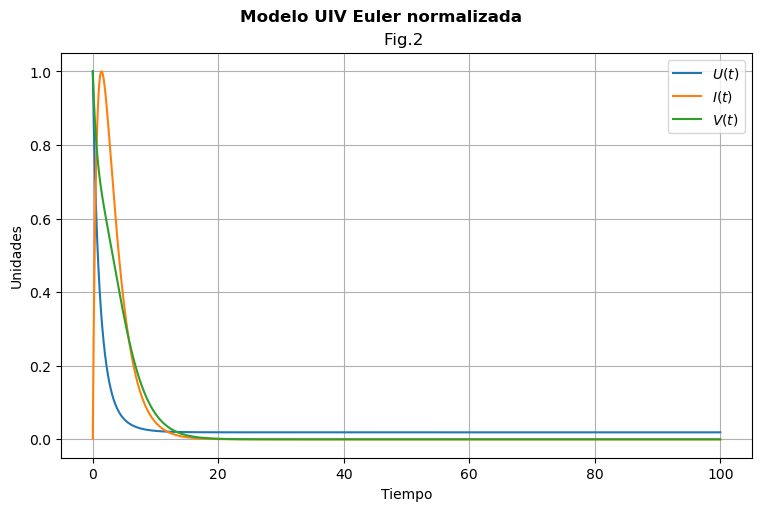

In [49]:
plt.figure(figsize=(7.5,5), layout="constrained")

plt.plot(lista_t, np.array(lista_U)/max_U, label = r"$U(t)$")
plt.plot(lista_t, np.array(lista_I)/max_I, label = r"$I(t)$")
plt.plot(lista_t, np.array(lista_V)/max_V, label = r"$V(t)$")

plt.suptitle("Modelo UIV Euler normalizada", fontweight='bold')
plt.title("Fig.2 ")
plt.ylabel("Unidades")
plt.xlabel("Tiempo")
plt.grid ()
plt.legend();

## Modelo con fase Eclipse

Este modelo considera células susceptibles (U), células infectadas (I), células infectadas en fase latente (E) y carga viral (V).

Ecuaciones que modelan el desarrollo de la VID:

$$ dU = -\beta UV$$
$$ dE = \beta UV - kE$$
$$ dI = kE - \delta I$$
$$ dV = pI - cV $$

In [23]:
def fueiv(r,t): # definimos nuestro sistema de ecuaciones dentro de una función
    U = r[0]
    E = r[1]
    I = r[2]
    V = r[3]
    
    dU = -beta*U*V
    dE = beta*U*V - k*E
    dI = k*E - delta*I 
    dV = p*I - c*V

    return np.array([dU,dE,dI,dV],float)

In [24]:
# Definimos otra función que resuelva numéricamente el sistema de 
# Ecuaciones mediante el método de Euler

def UEIV_EULER(fueiv,r,a,b,N): #r es un arreglo con las condiciones iniciales 
    h = (b-a)/N
    lista_t = np.arange(a,b,h)
    lista_U, lista_E, lista_I, lista_V = [],[],[],[]

    for t in lista_t: 

        r += h*fueiv(r,t)

        lista_U.append(r[0])
        lista_E.append(r[1])
        lista_I.append(r[2])
        lista_V.append(r[3])

    return lista_U, lista_E, lista_I, lista_V, lista_t

In [25]:
r_ueiv = np.array([1000,0,1,100],float)
k = 0.1
lista_U, lista_E, lista_I, lista_V, lista_t = UEIV_EULER(fueiv,r_ueiv,0,100,1e5)

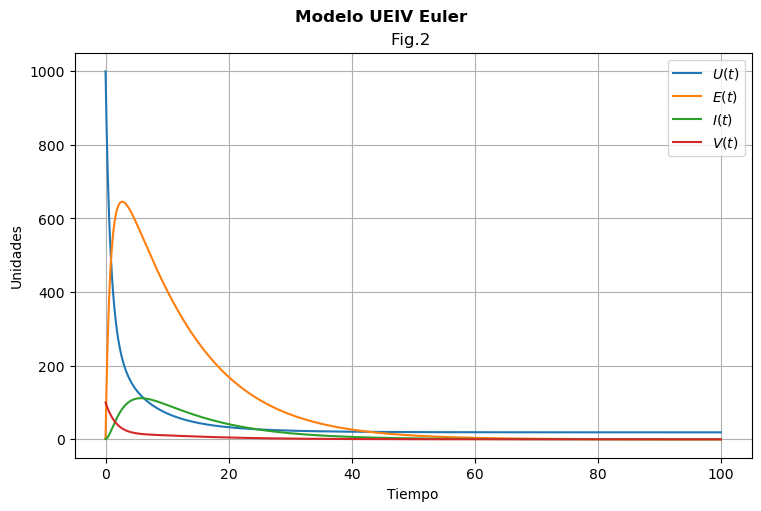

In [26]:
plt.figure(figsize=(7.5,5), layout="constrained")

plt.plot(lista_t, lista_U, label = r"$U(t)$")
plt.plot(lista_t, lista_E, label = r"$E(t)$")
plt.plot(lista_t, lista_I, label = r"$I(t)$")
plt.plot(lista_t, lista_V, label = r"$V(t)$")

plt.suptitle("Modelo UEIV Euler", fontweight='bold')
plt.title("Fig.2 ")
plt.ylabel("Unidades")
plt.xlabel("Tiempo")
plt.grid ()
plt.legend();

## Modelo con respuesta inmune

Este modelo consiste de células CLTs (E) y carga viral (V)
no es comparabe con los modelos anteriores por cuestiones de unidades y parámetros.

Las ecuaciones que describen su comportamiento son:

$$ dV = pV(1-\frac{V}{K_v})-c_vVE $$
$$ dE = rE(\frac{V}{V+K_e})-c_eE+s_E $$

$s_E$: repelishment rate, $c_e$: vida media de las CLTs.

$c_vE$: virus clearence, $E=s_E/c_e$ se debe satisfacer.

In [27]:
def fev(r,t): # definimos nuestro sistema de ecuaciones dentro de una función
    E = r[0]
    V = r[1]
    
    dV = p*V*(1-V/Kv) - cv*V*E
    dE = ri*E*V/(V+Ke) - ce*E + sE
    
    return np.array([dE,dV],float)

In [28]:
def EV_EULER(fev,r,a,b,N): #r es un arreglo con las condiciones iniciales 
    h = (b-a)/N
    lista_t = np.arange(a,b,h)
    lista_E, lista_V = [],[]

    for t in lista_t: 

        r += h*fev(r,t)

        lista_E.append(r[0])
        lista_V.append(r[1])

    return lista_E, lista_V, lista_t

In [29]:
# definimos las condiciones iniciales
r_ev = np.array([10**6,25],float)
p = 4.4
cv = 1.24*10**(-6)
ri = 0.33
Ke = 2.7*10**3
ce = 2*10**(-2)
Kv = 10**6
sE = 20**4
lista_E, lista_V, lista_t = EV_EULER(fev,r_ev,0,10,1e5)

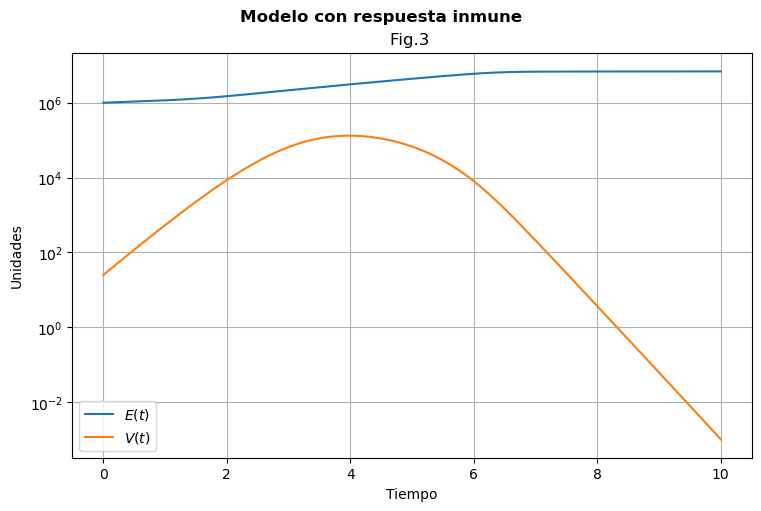

In [30]:
plt.figure(figsize=(7.5,5), layout="constrained")

plt.plot(lista_t, lista_E, label = r"$E(t)$")
plt.plot(lista_t, lista_V, label = r"$V(t)$")

plt.suptitle("Modelo con respuesta inmune", fontweight='bold')
plt.title("Fig.3 ")
plt.ylabel("Unidades")
plt.xlabel("Tiempo")
plt.yscale("log")
plt.grid ()
plt.legend();

# Capítulo 5 Ébola

## Modelo de virus de Ébola in vitro

Las ecuaciones que describen la evolución de la infección por ébola en el modelo in vitro son las siguentes.

$$ dU = \lambda -\rho U -\beta UV $$
$$ dI = \beta UV - \delta I $$
$$ dV = pI - cV $$

Las células se reponen (reproducen) a una frecuencia $\lambda$ y mueren naturalmente con una frecuencia $\rho$.

In [31]:
def febola(r,t): # definimos nuestro sistema de ecuaciones dentro de una función
    U = r[0]
    I = r[1]
    V = r[2]
    
    dU = l - rho*U -beta*U*V
    dI = beta*U*V - delta*I 
    dV = p*I - c*V

    return np.array([dU,dI,dV],float)

In [32]:
def EBOLA_EULER(f,r,a,b,N): #r es un arreglo con las condiciones iniciales 
    h = (b-a)/N
    lista_t = np.arange(a,b,h)
    lista_U, lista_I, lista_V = [],[],[]

    for t in lista_t:

        r += h*f(r,t)

        lista_U.append(r[0])
        lista_I.append(r[1])
        lista_V.append(r[2])

    return lista_U, lista_I, lista_V, lista_t

In [33]:
# definimos las condiciones iniciales
r_ebola = np.array([10000,1,10],float)
l = .01
rho = .001
beta = 0.0002
delta = 0.1
p = 0.01
c = 0.05
lista_U, lista_I, lista_V, lista_t = EBOLA_EULER(febola,r_ebola,0,100,1e5)

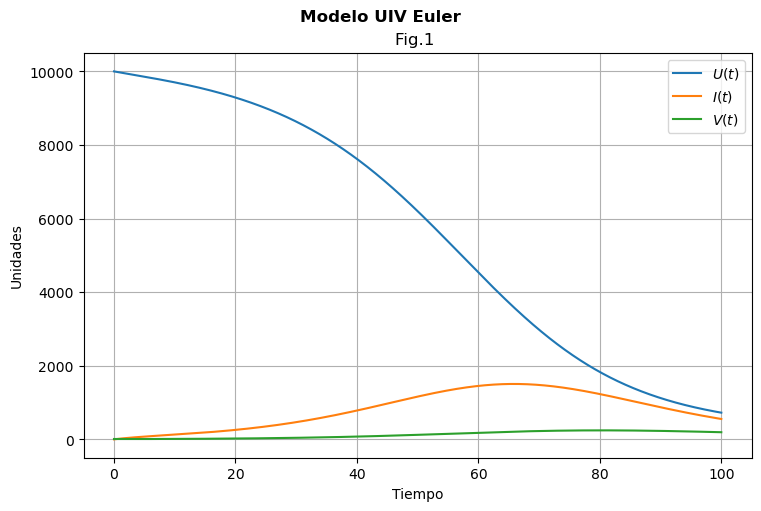

In [34]:
plt.figure(figsize=(7.5,5), layout="constrained")

plt.plot(lista_t, lista_U, label = r"$U(t)$")
plt.plot(lista_t, lista_I, label = r"$I(t)$")
plt.plot(lista_t, lista_V, label = r"$V(t)$")

plt.suptitle("Modelo UIV Euler", fontweight='bold')
plt.title("Fig.1 ")
plt.ylabel("Unidades")
plt.xlabel("Tiempo")
plt.grid ()
plt.legend();

Transmission measure: $$R_0=\frac{\lambda \rho \beta}{c\rho \delta}$$